In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

from helper import nn
from helper import logistic_regression as lr
import numpy as np

# get data and weights

In [2]:
X_raw, y_raw = nn.load_data('ex4data1.mat', transpose=False)
X = np.insert(X_raw, 0, np.ones(X_raw.shape[0]), axis=1)
X.shape

(5000, 401)

In [3]:
y = nn.expand_y(y_raw)
y.shape

(5000, 10)

In [4]:
t1, t2 = nn.load_weight('ex4weights.mat')
t1.shape, t2.shape

((25, 401), (10, 26))

In [5]:
theta = nn.serialize(t1, t2)  # flatten params
theta.shape

(10285,)

# sigmoid gradient

In [6]:
nn.sigmoid_gradient(0)

0.25

# theta gradient
super hard to get this right... the dimension is so confusing

In [7]:
d1, d2 = nn.deserialize(nn.gradient(theta, X, y))

In [8]:
d1.shape, d2.shape

((25, 401), (10, 26))

# gradient checking
<img style="float: left;" src="../img/gradient_checking.png">

In [15]:
%time nn.gradient_checking(theta, X, y, epsilon= 0.0001)

If your backpropagation implementation is correct,
the relative difference will be smaller than 10e-9 (assume epsilon=0.0001).
Relative Difference: 4.310401772268033e-10

CPU times: user 4min 42s, sys: 26.6 s, total: 5min 9s
Wall time: 2min 37s


# regularized gradient
Use normal gradient + regularized term

<img style="float: left;" src="../img/nn_reg_grad.png">

In [16]:
%time nn.gradient_checking(theta, X, y, epsilon=0.0001, regularized=True)

If your backpropagation implementation is correct,
the relative difference will be smaller than 10e-9 (assume epsilon=0.0001).
Relative Difference: 4.3600356763480135e-10

CPU times: user 4min 56s, sys: 29.1 s, total: 5min 25s
Wall time: 2min 45s


# ready to train the model

> remember to randomly initlized the parameters to break symmetry

take a look at the doc of this argument: `jac`

>jac : bool or callable, optional
Jacobian (gradient) of objective function. Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg. **If jac is a Boolean and is True, fun is assumed to return the gradient along with the objective function.** If False, the gradient will be estimated numerically. jac can also be a callable returning the gradient of the objective. In this case, it must accept the same arguments as fun.

it means if your `backprop` function return `(cost, grad)`, you could set `jac=True`  

This is the implementation of http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise4.ipynb

but I choose to seperate them

In [57]:
res = nn.nn_training(X, y)
res

     fun: 0.3173710035424091
     jac: array([ -3.15512440e-06,  -6.84593278e-09,   1.43790404e-08, ...,
        -8.57583963e-07,   5.43360278e-05,   4.05737045e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 400
     nit: 26
  status: 3
 success: False
       x: array([  0.00000000e+00,  -3.42296639e-05,   7.18952021e-05, ...,
        -1.28765432e+00,   1.29421745e+00,  -1.63826310e+00])

# show accuracy

In [58]:
_, y_answer = nn.load_data('ex4data1.mat')
y_answer[:20]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10], dtype=uint8)

In [59]:
final_theta = res.x

In [60]:
nn.show_accuracy(final_theta, X, y_answer)

0.9506

# show hidden layer

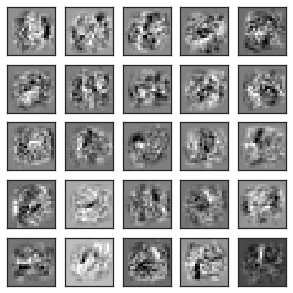

In [66]:
nn.plot_hidden_layer(final_theta)